In [2]:
import tdms
import imp
imp.reload(tdms)
import plot
import functions
import numpy as np
import matplotlib
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Long-term plasticity

In [3]:
data_pre = tdms.read_tdms("/Volumes/DATA/data/tdms/6.19.17pre-induction baseline.tdms")
data_post = tdms.read_tdms("/Volumes/DATA/data/tdms/6.19.17post-induction baseline.tdms")
# data = tdms.read_tdms("/Volumes/DATA/data/tdms/CHSL-6.8.1701-8ICLAMPSPIKES.tdms")
# data = tdms.read_tdms("/Volumes/DATA/data/tdms/CHSL-6.8.1702iclamp-1.tdms")

In [4]:
tstim1 = 200.0
tstim2 = 235.0
tpulsestart = 700.0
pulsedur = 100.0

<IPython.core.display.Javascript object>


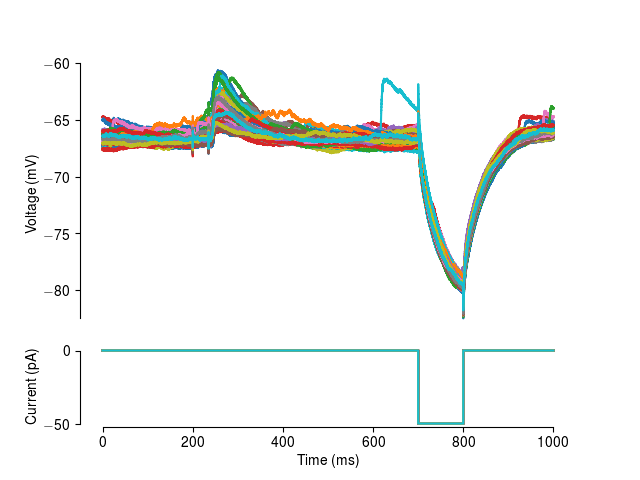

<IPython.core.display.Javascript object>


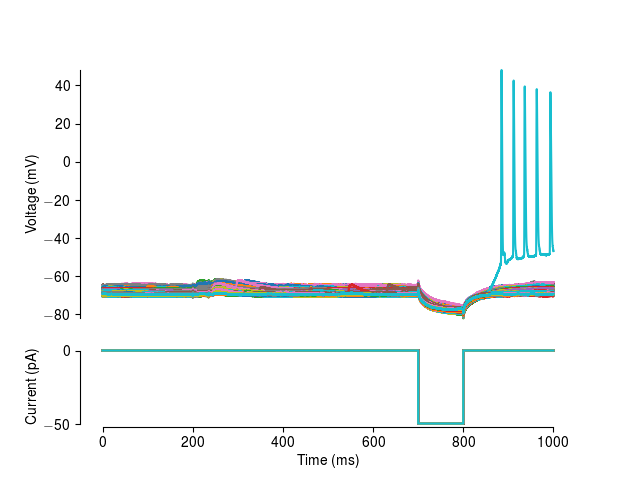

<IPython.core.display.Javascript object>


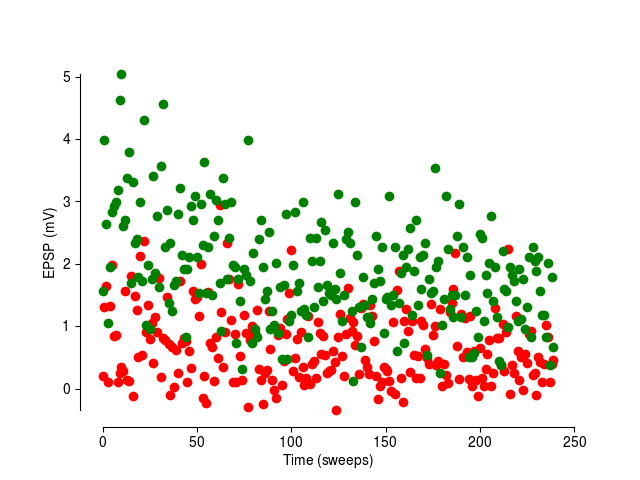

<IPython.core.display.Javascript object>


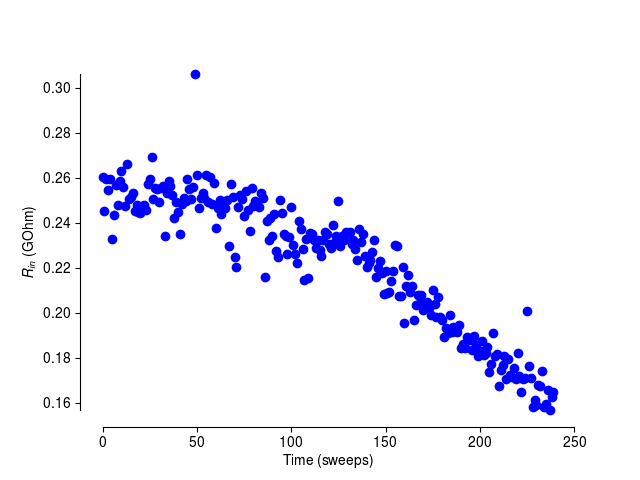

In [5]:
fig, axv, axi = plot.plot_traces(mode='cclamp')

prepeaks1, prepeaks2 = [], []
prerins, postrins = [], []

dt = data_pre['dt']
for sweep, command in zip(data_pre['AI0'], data_pre['AO0']):
    baseline = np.mean(sweep[:int((tstim1-1.0)/dt)])
    baseline2 = np.min(sweep[int((tstim2+2.0)/dt):int((tstim2+5.0)/dt)])
    prepeaks1.append(np.max(sweep[int((tstim1+5.0)/dt):int((tstim2-5.0)/dt)]-baseline))
    prepeaks2.append(np.max(sweep[int((tstim2+5.0)/dt):int((tstim2+25.0)/dt)]-baseline2))
    
    iamp = np.min(command-np.mean(command[:int((tpulsestart-5)/dt)]))
    vamp = np.min(sweep[
        int((tpulsestart+5)/dt):int((tpulsestart+pulsedur-2.0)/dt)]-np.mean(
        sweep[int((tpulsestart-25)/dt):int((tpulsestart-5)/dt)]))
    prerins.append(vamp/iamp)
                         
    times = np.arange(sweep.shape[0])*data_pre['dt']
    axv.plot(times, sweep)
    axi.plot(times, command)

fig, axv, axi = plot.plot_traces(mode='cclamp')

postpeaks1, postpeaks2 = [], []
rins = []

dt = data_post['dt']
for sweep, command in zip(data_post['AI0'], data_post['AO0']):
    baseline = np.mean(sweep[:int((tstim1-1.0)/dt)])
    baseline2 = np.min(sweep[int((tstim2+2.0)/dt):int((tstim2+5.0)/dt)])
    postpeaks1.append(np.max(sweep[int((tstim1+5.0)/dt):int((tstim2-5.0)/dt)]-baseline))
    postpeaks2.append(np.max(sweep[int((tstim2+5.0)/dt):int((tstim2+25.0)/dt)]-baseline2))
                         
    iamp = np.min(command-np.mean(command[:int((tpulsestart-5)/dt)]))
    vamp = np.min(sweep[
        int((tpulsestart+5)/dt):int((tpulsestart+pulsedur-2.0)/dt)]-np.mean(
        sweep[int((tpulsestart-25)/dt):int((tpulsestart-5)/dt)]))
    postrins.append(vamp/iamp)

    times = np.arange(sweep.shape[0])*data_post['dt']
    axv.plot(times, sweep)
    axi.plot(times, command)

fig, ax = plot.plot_iv(zeroori=False, xlabel='Time (sweeps)', ylabel='EPSP (mV)')
ax.plot(prepeaks1+postpeaks1, 'or')
ax.plot(prepeaks2+postpeaks2, 'og')

fig, ax = plot.plot_iv(zeroori=False, xlabel='Time (sweeps)', ylabel=r'$R_{in}$ (GOhm)')
plt.plot(prerins+postrins, 'ob')
# plt.plot(np.array(prepeaks2+postpeaks2)/np.array(prepeaks1+postpeaks1), 'o')
plt.show()

In [6]:
data.keys()

['yunits', u'A00', u'A01', 'dt', u'AI0']

In [16]:
from nptdms import TdmsFile

In [17]:
tdms_file = TdmsFile("/Volumes/DATA/data/tdms/CHSL-6.8.1701-9VCLAMPNACURRENT.tdms")

In [18]:
tdms_file.groups()

[u'AO0', u'AI0']

In [19]:
tdms_file.object().properties['Sampling Rate(AI)']

u'25000'

In [20]:
1.0/25000

4e-05

In [5]:
print(gfit)

[ 3.03668121  8.70758923]
